## Importing the Required Libraries

In [85]:
import pandas as pd # for data manipulation or analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import pickle #for dumping the model or we can use joblib library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
import pickle

## Reading the CSV file

In [86]:
data=pd.read_csv('Comb_heart_data.csv')

## 1) EDA

## Checking first five rows.

In [87]:
data.head()

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


## Checking for the last Five rows.

In [88]:
data.tail()

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
924,54,0,4,127,333,1,1,154,0,0,?,?,?,1
925,62,1,1,?,139,0,1,?,?,?,?,?,?,0
926,55,1,4,122,223,1,1,100,0,0,?,?,6,2
927,58,1,4,?,385,1,2,?,?,?,?,?,?,0
928,62,1,2,120,254,0,2,93,1,0,?,?,?,1


## Conclusion:- After Checking the last five rows we can say that, There are Some missing values exist in our dataset, so we need to take care of Preprocessing the data very carefully.

## Information of about dataset

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              929 non-null    int64 
 1   Sex              929 non-null    int64 
 2   ChestPain        929 non-null    int64 
 3   Rest_bp          929 non-null    object
 4   Cholestrol       929 non-null    object
 5   Fast_bld_sugar   929 non-null    object
 6   Rest_Ecg         929 non-null    object
 7   Max_Rt           929 non-null    object
 8   Ex_Angina        929 non-null    object
 9   St_Depr          929 non-null    object
 10  Slope            929 non-null    object
 11  Colored_Vessels  929 non-null    object
 12  Thalassemia      929 non-null    object
 13  Target           929 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 101.7+ KB


## Statistical Information

In [90]:
data.describe(include='all')

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
count,929.000000,929.000000,929.000000,929,929,929,929,929,929,929,929,929,929,929.00000
unique,NaN,NaN,NaN,59,181,3,4,118,3,53,4,5,4,NaN
top,NaN,NaN,NaN,120,0,0,0,?,0,0,2,0,3,NaN
freq,NaN,NaN,NaN,103,172,684,467,54,528,280,394,354,355,NaN
mean,55.612487,0.773950,3.304629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.17761
std,8.994760,0.418497,0.917261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24555
min,29.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
25%,50.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
50%,57.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000
75%,62.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000


In [91]:
data.columns

Index(['Age', 'Sex', 'ChestPain', 'Rest_bp', 'Cholestrol', 'Fast_bld_sugar',
       'Rest_Ecg', 'Max_Rt', 'Ex_Angina', 'St_Depr', 'Slope',
       'Colored_Vessels', 'Thalassemia', 'Target'],
      dtype='object')

In [92]:
data.dtypes

Age                 int64
Sex                 int64
ChestPain           int64
Rest_bp            object
Cholestrol         object
Fast_bld_sugar     object
Rest_Ecg           object
Max_Rt             object
Ex_Angina          object
St_Depr            object
Slope              object
Colored_Vessels    object
Thalassemia        object
Target              int64
dtype: object

In [93]:
data.shape

(929, 14)

In [94]:
data['Target'].value_counts()

0    387
1    214
2    145
3    142
4     41
Name: Target, dtype: int64

In [95]:
# Percentage of patients have and do not have heart disease
data['Target'].value_counts()/data.shape[0]*100 

0    41.657696
1    23.035522
2    15.608181
3    15.285253
4     4.413348
Name: Target, dtype: float64

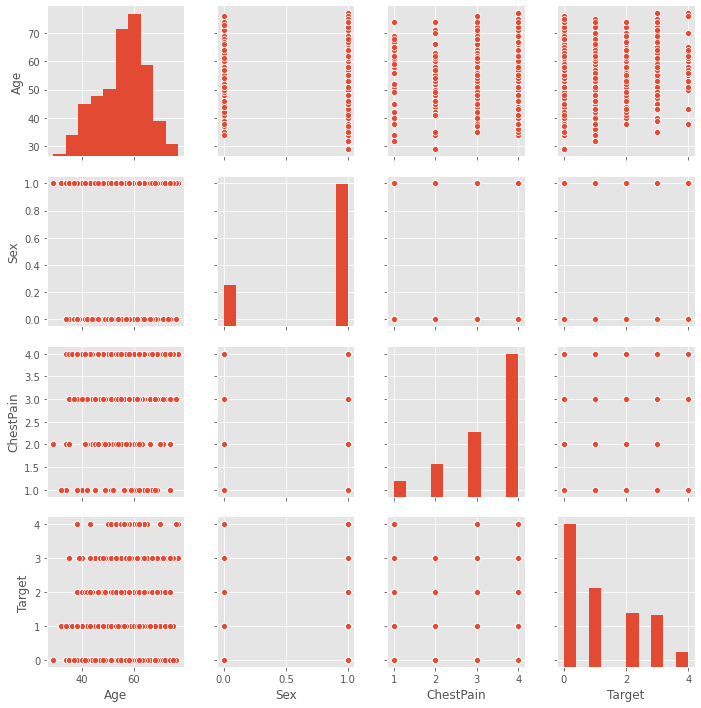

In [96]:
sns.pairplot(data)

## Conclusion:- As per the Pairplot we can definitely see that it is going to be non-linear classification, as the most of the points are overlapping, at this stage we can say that Bagging or Boosting algorithm may give us the better results over Logistic Regression.

## 2) Feature Engineering

## So there are values in some columns which are not clear, so converting them to NaN.

In [97]:
data['Rest_bp'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Cholestrol'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Fast_bld_sugar'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Rest_Ecg'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Max_Rt'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Ex_Angina'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['St_Depr'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Slope'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Colored_Vessels'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Thalassemia'].replace(to_replace= '?' ,value=np.nan,inplace=True)

## Find out what percentage of values are missing

In [98]:
total_cells=np.product(data.shape)
missing_value_count=data.isnull().sum()
missing_cell=missing_value_count.sum()
print(missing_cell/total_cells*100)

7.558050130708903


## Checking for the Missing Values in the Respective Column.

In [99]:
data.isnull().sum()

Age                  0
Sex                  0
ChestPain            0
Rest_bp             58
Cholestrol           7
Fast_bld_sugar      82
Rest_Ecg             1
Max_Rt              54
Ex_Angina           54
St_Depr             62
Slope              119
Colored_Vessels    324
Thalassemia        222
Target               0
dtype: int64

## As per the Documentation of the dataset there is no information of the target variables having categorized as 2,3 or 4 so we are impute them as 0 to make our problem to simpler binary classification.

In [100]:
fil = (data.Target == 2) | (data.Target== 3) | (data.Target== 4)
data.loc[fil,'Target']=0
data.Target.value_counts()

0    715
1    214
Name: Target, dtype: int64

## Correlation

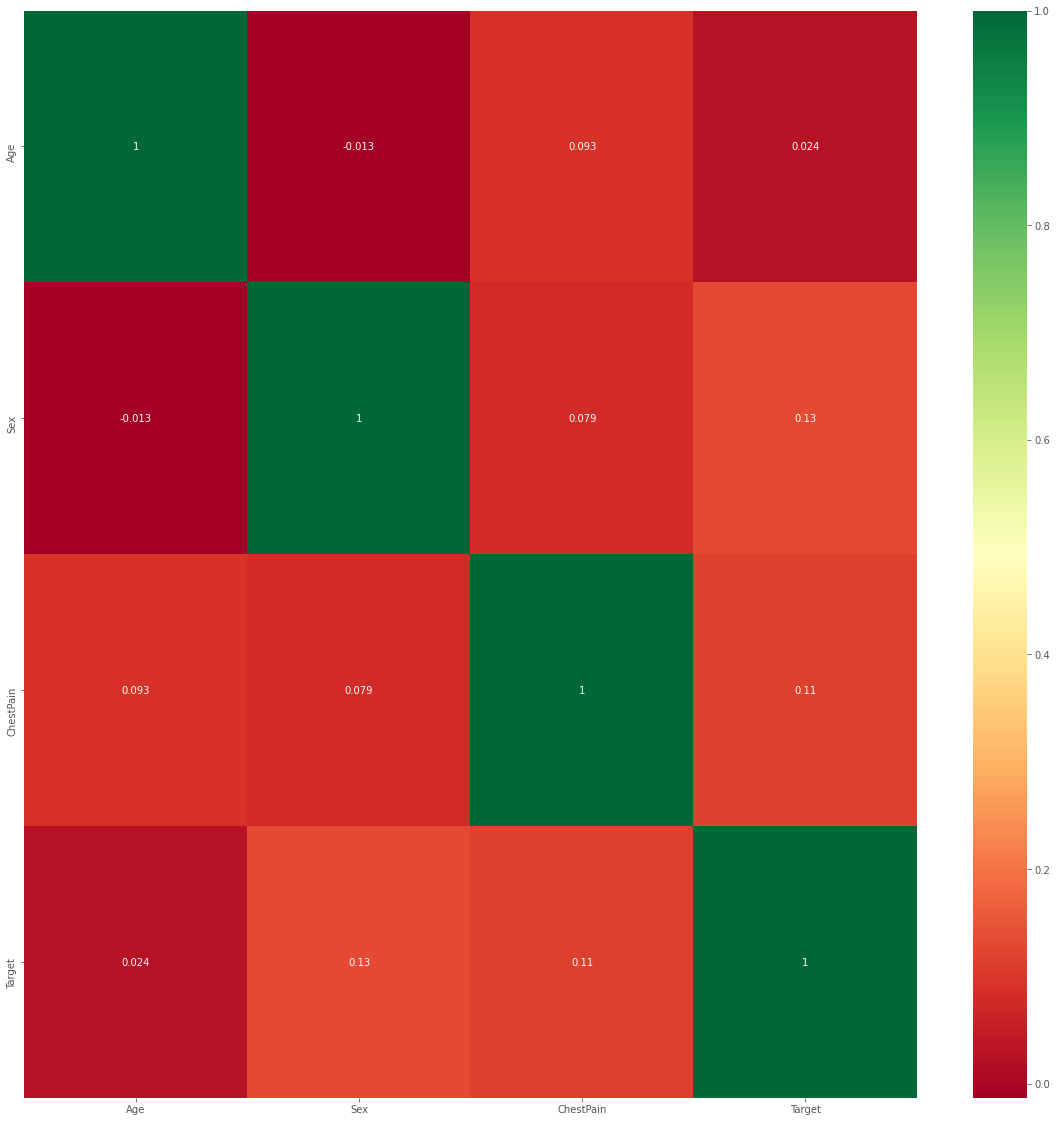

In [101]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Conclusion:- As there is only 4 numerical features(i.e.of datatype=int64) present in the dataset we can able to see the correlation amongst them only.

## To check whether our dataset is imbalanced or not.

In [102]:
(715/929)*100

76.96447793326158

In [103]:
(214/929)*100

23.03552206673843

## Checking our Target Variable.

Text(0, 0.5, 'COUNT')

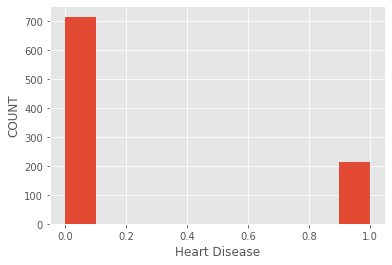

In [104]:
plt.style.use('ggplot')
data['Target'].hist()
plt.xlabel('Heart Disease')
plt.ylabel('COUNT')

## Conclusion:-Definitely we can see that our data is imbalanced.

In [105]:
Have_Heart_Disease = len(data[data['Target']==1])
Not_Have_Heart_Disease = len(data[data['Target']==0])
print("Having Heart Disease:",Have_Heart_Disease)
print("Not Having Heart Disease:", Not_Have_Heart_Disease)

Having Heart Disease: 214
Not Having Heart Disease: 715


In [106]:
##data.isnull().sum()

In [107]:
##data_missing = data.isna()
##data_missing.head()

In [108]:
##data_missing.dtypes

In [109]:
##data_num_missing = data_missing.sum()
##data_num_missing

## Percentage of Missing values

In [110]:
data.isna().mean().round(4) * 100 

Age                 0.00
Sex                 0.00
ChestPain           0.00
Rest_bp             6.24
Cholestrol          0.75
Fast_bld_sugar      8.83
Rest_Ecg            0.11
Max_Rt              5.81
Ex_Angina           5.81
St_Depr             6.67
Slope              12.81
Colored_Vessels    34.88
Thalassemia        23.90
Target              0.00
dtype: float64

## Percentage of Non-Missing values for each column

In [111]:
(data.count() / len(data))*100

Age                100.000000
Sex                100.000000
ChestPain          100.000000
Rest_bp             93.756728
Cholestrol          99.246502
Fast_bld_sugar      91.173305
Rest_Ecg            99.892357
Max_Rt              94.187298
Ex_Angina           94.187298
St_Depr             93.326157
Slope               87.190527
Colored_Vessels     65.123789
Thalassemia         76.103337
Target             100.000000
dtype: float64

## Conclusion:- This states that we do not have less than 30% Non-Missing values so we did not drop any of the columns instead we will impute the values for the same.

## Missing value Imputation

In [112]:
df1 = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

## Cross Checking the Missing Values

In [113]:
df1.isnull().sum()

Age                0
Sex                0
ChestPain          0
Rest_bp            0
Cholestrol         0
Fast_bld_sugar     0
Rest_Ecg           0
Max_Rt             0
Ex_Angina          0
St_Depr            0
Slope              0
Colored_Vessels    0
Thalassemia        0
Target             0
dtype: int64

## Now there no Missing value present in our dataset.

In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              929 non-null    int64 
 1   Sex              929 non-null    int64 
 2   ChestPain        929 non-null    int64 
 3   Rest_bp          929 non-null    object
 4   Cholestrol       929 non-null    object
 5   Fast_bld_sugar   929 non-null    object
 6   Rest_Ecg         929 non-null    object
 7   Max_Rt           929 non-null    object
 8   Ex_Angina        929 non-null    object
 9   St_Depr          929 non-null    object
 10  Slope            929 non-null    object
 11  Colored_Vessels  929 non-null    object
 12  Thalassemia      929 non-null    object
 13  Target           929 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 101.7+ KB


## Defining the Feature as Independent and Dependent

In [115]:
y=df1['Target']
X=df1.drop(['Target'],axis=1)

## Feature Selection

In [116]:
from sklearn.ensemble import ExtraTreesClassifier
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

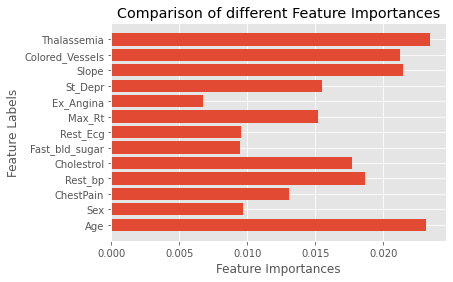

In [117]:
# Plotting a Bar Graph to compare the models
plt.barh(X.columns, feature_importance_normalized)
plt.xlabel('Feature Importances')
plt.ylabel('Feature Labels')
plt.title('Comparison of different Feature Importances')
plt.show()

In [118]:
y=df1['Target']
X=df1[['Age','Rest_bp','Colored_Vessels','Slope','Rest_Ecg','Cholestrol']]

## Now As our dataset is imbalanced, we need to perform oversampling to make that classes balanced, otherwise our model gets biased towards higher number category records and will give us incorrect results.

## Oversampling

In [119]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [120]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [121]:
X_res.shape,y_res.shape

((1384, 6), (1384,))

In [122]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 715, 1: 214})
Resampled dataset shape Counter({0: 692, 1: 692})


In [123]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [124]:
os =  RandomOverSampler(sampling_strategy=0.5)

In [125]:
X_train_res, y_train_res = os.fit_sample(X, y)

In [126]:
X_train_res.shape,y_train_res.shape

((1072, 6), (1072,))

In [127]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 715, 1: 214})
Resampled dataset shape Counter({0: 715, 1: 357})


In [128]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek(sampling_strategy=1)

X_train_res1, y_train_res1 = os_us.fit_sample(X, y)

In [129]:
X_train_res1.shape,y_train_res1.shape

((1394, 6), (1394,))

In [130]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res1)))

Original dataset shape Counter({0: 715, 1: 214})
Resampled dataset shape Counter({0: 697, 1: 697})


## Train Test Split on our final Balanced Dataset

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train_res1,y_train_res1,test_size = 0.3,random_state = 10)

In [132]:
X_train.shape

(975, 6)

In [133]:
X_test.shape

(419, 6)

## Feature scaling of data

In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Machine Learning Model Building
1.Suppor vector Classifier

In [135]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  #for classification report
#Svm model
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuarcy_svm=accuracy_score(y_test, y_pred_scv)
print(accuarcy_svm)

0.548926014319809


## Confusion Matrix

In [136]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred_scv)
print("Confusion Matrix:")
print(cm1)

Confusion Matrix:
[[174  30]
 [159  56]]


## True Positives,True Negatives,False Positive,False Negative

In [137]:
tn1, fp1, fn1, tp1 = cm1.ravel()
(tn1, fp1, fn1, tp1)

(174, 30, 159, 56)

## 2) Logistic Regresion

In [138]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 51)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)
accuarcy_lr=accuracy_score(y_test, y_pred_lr)
print(accuarcy_lr)

0.4797136038186158


## Confusion Matrix

In [139]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm2)

Confusion Matrix:
[[107  97]
 [121  94]]


## True Positives,True Negatives,False Positive,False Negative

In [140]:
tn2, fp2, fn2, tp2 = cm2.ravel()
(tn2, fp2, fn2, tp2)

(107, 97, 121, 94)

## 3) Decision Tree Classifier

In [141]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuarcy_dt=accuracy_score(y_test, y_pred_dt)
print(accuarcy_dt)

0.8400954653937948


## Confusion Matrix

In [142]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm3)

Confusion Matrix:
[[168  36]
 [ 31 184]]


## True Positives,True Negatives,False Positive,False Negative

In [143]:
tn3, fp3, fn3, tp3 = cm3.ravel()
(tn3, fp3, fn3, tp3)

(168, 36, 31, 184)

## 4) Random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 51)
rfc.fit(X_train,y_train)
y_pred_rf = rfc.predict(X_test)
accuarcy_rf=accuracy_score(y_test, y_pred_rf)
print(accuarcy_rf)

0.8878281622911695


## Confusion Matrix

In [145]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm4)

Confusion Matrix:
[[187  17]
 [ 30 185]]


## True Positives,True Negatives,False Positive,False Negative

In [146]:
tn4, fp4, fn4, tp4 = cm4.ravel()
(tn4, fp4, fn4, tp4)

(187, 17, 30, 185)

## Randomized Search CV

In [147]:
params={
 "n_estimators"    : [200, 400,500,600] ,
 "max_features"    : ['auto','sqrt','log2'],
 "max_depth"       : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_split" : [ 2, 5, 10],
 "min_samples_leaf" : [1, 2, 4],
 "bootstrap"      :[True, False],
 "oob_score"      :[True,False]
}

In [148]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Timer function to check how much time will be required.

In [149]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

## Object of Random Forest Classifier

In [150]:
randomforestclassifier_Tuned=RandomForestClassifier()

## Randomized Search CV with Given parameters

In [151]:
random_search=RandomizedSearchCV(randomforestclassifier_Tuned,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [152]:
X=X_train_res1
Y=y_train_res1

## Processing of Randomized Search CV

In [153]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    4.9s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.0s finished



 Time taken: 0 hours 0 minutes and 7.45 seconds.


In [154]:
X.head()

,Age,Rest_bp,Colored_Vessels,Slope,Rest_Ecg,Cholestrol
0,63,145.0,0.0,3.0,2.0,233.0
1,67,160.0,3.0,2.0,2.0,286.0
2,67,120.0,2.0,2.0,2.0,229.0
3,37,130.0,0.0,3.0,0.0,250.0
4,41,130.0,0.0,1.0,2.0,204.0


## Best estimators for algorithms

In [155]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Best Parameters based on the parameters we have provided.

In [156]:
random_search.best_params_

{'oob_score': False,
 'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': False}

## trying to fit the Model once again.

In [157]:
classifier=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Checking the accuracy by using cross validation

In [158]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)

## Accuracy on each fold

In [159]:
score

array([0.89285714, 0.86428571, 0.61428571, 0.95714286, 0.96402878,
       0.97122302, 0.94964029, 0.63309353, 0.84172662, 0.84172662])

## Mean Accuracy

In [160]:
score.mean()

0.8530010277492291

## Best parameters

In [161]:
best_parameters = random_search.best_params_
best_parameters

{'oob_score': False,
 'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': False}

## Prediction on Tuned Model

In [162]:
y_pred_randomforest =random_search.predict(X_test)

In [163]:
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score
roc=roc_auc_score(y_test, y_pred_randomforest)
acc = accuracy_score(y_test, y_pred_randomforest)
prec = precision_score(y_test, y_pred_randomforest)
rec = recall_score(y_test, y_pred_randomforest)
f1 = f1_score(y_test, y_pred_randomforest)
model6_Tuned =  pd.DataFrame([['Random Forest Classifier MODEL TUNED', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Precision','Recall', 'F1 Score','ROC'])

In [164]:
model6_Tuned

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Classifier MODEL TUNED,0.959427,0.962617,0.95814,0.960373,0.959462


## Generating Pickle

In [165]:
import pickle
# open a file, where you ant to store the data
file = open('rf_classification_model.pkl', 'wb')

# dump information to that file
pickle.dump(model6_Tuned, file)

In [166]:
model6_Tuned.to_pickle('model6_Tuned_rf')

In [167]:
df=pd.read_pickle('model6_Tuned_rf')

In [168]:
df.head()

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Classifier MODEL TUNED,0.959427,0.962617,0.95814,0.960373,0.959462


Conclusion:-Random Forest Gives us Best Accuracy amongst all other models, as it is using Row Sampling with Replacement as well as Feature Sampling Replacement technique to process different subset of the sample data and not based on one decision tree but based on the aggregation of the decision trees(Voting Classifer) gives us the correct prediction which results into Low variance as well.